In [1]:
using Pkg
using Distributions
using ForwardDiff
using LinearAlgebra
using Optim
using Plots
using Random
using SSM

ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.


In [2]:
Random.seed!(1234)
g = 9.81
l=1
# time differential
dt = 0.01
# transition matrix
A = Matrix{Float64}([1.0 dt; -g/l*dt 1.0])
# Initial state
x0 = [0.0, 1.0]
# Define the LDS model parameters
C = Matrix{Float64}(I(2))  # Observation matrix (assuming direct observation)
Q = Matrix{Float64}(0.01 * I(2))  # Process noise covariance
observation_noise_std = 0.5
R = Matrix{Float64}((observation_noise_std^2) * I(2))  # Observation noise covariance
P0 = Matrix{Float64}(0.1*I(2))  # Initial state covariance

lds = SSM.GaussianLDS(;A=A, C=C, Q=Q, R=R, x0=x0, P0=P0, obs_dim=2, latent_dim=2, fit_bool=[true, true, true, true, true, true])

x, y = SSM.sample(lds, 100)

([-0.11375626857646887 1.343805512755226; -0.05829349566953871 1.2863979124749656; … ; 0.38927459888641114 0.060924881414345565; 0.2173556424880684 0.0922845673904967], [-0.32355107704589325 1.7032604814881955; 0.9690880323624795 1.4488442771984236; … ; -0.039807549312631696 0.06407608359556304; 0.20445211038157346 -0.0018833125233974485])

In [13]:
lls = fit!(lds, y, max_iter=10000, tol=1e-3)

Fitting LDS via EM... 100%|██████████████████████████████| Time: 0:00:27


10000-element Vector{Float64}:
 694.7980944513525
 694.7998687390138
 694.8016428885039
 694.8034168719496
 694.8051908184788
 694.806964714163
 694.8087386998694
 694.8105125896498
 694.8122862028549
 694.8140599591902
   ⋮
 710.0560720089759
 710.0573960514305
 710.0587197618762
 710.0600435023835
 710.0613671887004
 710.0626908511553
 710.064014459557
 710.0653381409517
 710.0666617706355

In [16]:
diff(lls)

9999-element Vector{Float64}:
 0.0017742876613056069
 0.0017741494900747057
 0.001773983445673366
 0.0017739465291697343
 0.0017738956842094922
 0.001773985706449821
 0.0017738897803383225
 0.0017736132051595632
 0.001773756335296639
 0.001773615113734195
 ⋮
 0.001324047580737897
 0.0013240424545983842
 0.001323710445717552
 0.0013237405072459296
 0.0013236863169368007
 0.0013236624548653708
 0.001323608401776255
 0.0013236813946377879
 0.0013236296838385897

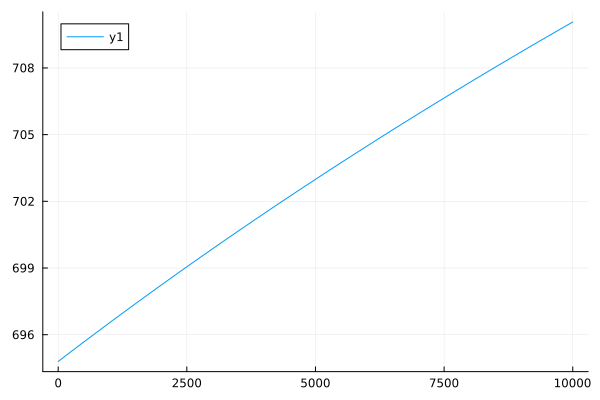

In [17]:
plot(lls)

In [18]:
lds.state_model.Q

2×2 Matrix{Float64}:
 0.0100715   0.00704897
 0.00704897  0.00493425

In [6]:
# test out the LDS model
lds_old = SSM.LDS(;A=A, H=C, Q=Q, R=R, x0=x0, p0=P0, obs_dim=2, latent_dim=2)

KalmanFilterEM!(lds_old, y, 1000, 1e-3, RTSSmoothing())

Fitting LDS via EM... 100%|██████████████████████████████| Time: 0:00:00


428-element Vector{Any}:
 -173.66955056880425
 -166.7477240941693
 -166.2134052236207
 -165.99114006979946
 -165.86071748802325
 -165.77060400616745
 -165.70165702728855
 -165.64520180819108
 -165.59681244885934
 -165.55401681187328
    ⋮
 -162.59996760387156
 -162.59892709326232
 -162.59789323195554
 -162.59686596424478
 -162.59584523497193
 -162.5948309895218
 -162.59382317381636
 -162.5928217343084
 -162.59182661797675

In [7]:
lds_old.Q

2×2 Matrix{Float64}:
 0.0101253   0.00704021
 0.00704021  0.0050727

In [ ]:
x, p_smooth, inverse_offdiag = SSM.DirectSmoother(lds_old, y)